# Contents

Python data analysis environment
- IPython
- Jupyter
- Conda

# IPython

Interactive Python

- A powerful interactive shell.
- A kernel for [Jupyter](https://jupyter.org).
- Support for interactive data visualization and use of [GUI toolkits](http://ipython.org/ipython-doc/stable/interactive/reference.html#gui-event-loop-support).
- Flexible, [embeddable interpreters](http://ipython.org/ipython-doc/stable/interactive/reference.html#embedding-ipython)
- Easy to use, high performance tools for [parallel computing](https://ipyparallel.readthedocs.io/en/latest/).

## Magic commands

%로 유용한 기능들을 쓸 수 있다.

### 실행 시간 재기

In [1]:
%timeit [i**2 for i in range(1000)]

352 µs ± 23.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


timeit은 주어진 라인을 여러번 실행하고 실행 시간을 잰다. 코드의 결과는 출력하지 않는다.

%%는 cell magics라고 불리며 셀 전체에 적용된다. 반드시 셀 첫줄에 써야 한다.

In [2]:
%%timeit
[i**2 for i in range(1000)]

316 µs ± 5.32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


- % : line magic
- %% : cell magic

### 히스토리

In [3]:
%history

%timeit [i**2 for i in range(1000)]
%%timeit
[i**2 for i in range(1000)]
%history


### 셀의 내용을 파일에 쓰기.  
%%writefile [filename]

In [4]:
%%writefile hello.py
def hello():
    print('Hello world')
hello()

Overwriting hello.py


### 파일 실행하기

In [5]:
%run hello.py

Hello world


### 다시 로드하기

파이썬은 한번 로드된 모듈은 import 문을 실행해도 다시 로드하지 않는다.  
하지만 자신이 만든 모듈을 계속 수정하고 불러와야 할 때 이 점은 매우 불편할 수 있다.  
이 작동 방식을 바꾸는 방법을 magic command가 제공한다. built-in은 아니고 extension으로 존재한다.

In [6]:
from hello import hello

Hello world


In [7]:
hello()

Hello world


In [20]:
%%writefile hello.py
def hello():
    print('Bye world')
hello()

Overwriting hello.py


In [21]:
from hello import hello

Bye world


In [22]:
hello()

Bye world


In [16]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
%autoreload 2

In [19]:
from hello import hello
hello()

Hello world


%autoreload : Reload all modules (except those excluded by %aimport) automatically now.  
%autoreload 0 : Disable automatic reloading.  
%autoreload 1 : Reload all modules imported with %aimport every time before executing the Python code typed.  
%autoreload 2 : Reload all modules (except those excluded by %aimport) every time before executing the Python code typed.  

경험 상  
%autoreload 2가 가장 편리하다.

### 노트북 상에서 그래프 표시하기

Python에서 가장 전통적인 그래프 그리는 라이브러리는 matplotlib이다.  
matplotlib은 직접적으로 노트북 위에서 그래프를 보여주는 기능을 제공하지는 않는다.  
따라서 그냥 matplotlib을 쓰면 노트북 상에서는 아무것도 보이지 않는다.  
하지만 magic command로 이를 가능케 할 수 있다.

In [9]:
%matplotlib inline

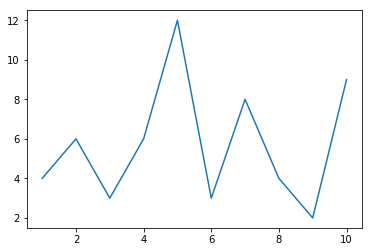

In [12]:
from matplotlib import pyplot as plt
plt.plot([1,2,3,4,5,6,7,8,9,10], [4,6,3,6,12,3,8,4,2,9])

### 모든 magic commands 보기

In [1]:
%magic

## Shell Commands

Command Line Interface(CLI)를 Python 안에서 쓸 수 있다

In [2]:
!pip --version

pip 9.0.1 from /Users/dreamgonfly/anaconda/lib/python3.5/site-packages (python 3.5)


In [7]:
!date

Mon Jan 22 14:17:24 KST 2018


자주 쓰이는 명령어는 느낌표(!) 없이도 사용 가능하다.  
(사실은 magic command에 해당한다)

In [3]:
cd ..

/Users/dreamgonfly/Documents/modulabs/Lectures


In [4]:
pwd

'/Users/dreamgonfly/Documents/modulabs/Lectures'

In [8]:
ls

00_math/                        04_deep_reinforcement_learning/
01_programming/                 05_tools/
02_deep_learning101/            README.md
03_deep_image_processing/       images/


## Help & Tab completion

In [ ]:
ran

In [13]:
range()

TypeError: range expected 1 arguments, got 0

In [ ]:
open('02_')

In [ ]:
from random import 

In [23]:
from random import randint

In [14]:
range?

### 구현 코드를 직접 확인하기

In [21]:
randint??

## 이전 명령어 & 결과 보기

### 직전 결과

In [31]:
79 * 94

7426

In [32]:
_

7426

### 전전 결과

In [33]:
92 * 21

1932

In [34]:
13 * 93

1209

In [35]:
__

1932

### 이전 명령어 & 결과

In [45]:
In[30]

'__'

In [44]:
Out[30]

7347

## pdb

Python Debugger  

In [6]:
def buggy_function(numbers):
    length = len(numbers)
    for k, i in enumerate(range(length)):
        print(k, numbers[i+1] - numbers[i])

In [7]:
buggy_function([1,4,9,20,30])

0 3
1 5
2 11
3 10


IndexError: list index out of range

In [8]:
%debug

> <ipython-input-6-bc71c9cec799>(4)buggy_function()
      1 def buggy_function(numbers):
      2     length = len(numbers)
      3     for k, i in enumerate(range(length)):
----> 4         print(k, numbers[i+1] - numbers[i])

ipdb> k
4
ipdb> i
4
ipdb> q


**PDB 명령어	실행내용 **  
- help	도움말  
- next	다음 문장으로 이동  
- print	변수값 화면에 표시  
- list	소스코드 리스트 출력. 현재 위치 화살표로 표시됨  
- where	콜스택 출력  
- continue	계속 실행. 다음 중단점에 멈추거나 중단점 없으면 끝까지 실행  
- step	Step Into 하여 함수 내부로 들어감  
- return	현재 함수의 리턴 직전까지 실행  
- !변수명 = 값	변수에 값 재설정  
- up : 한 프레임 위로
- down : 한 프레임 아래로
- quit : pdb 종료

### 예제

In [ ]:
buggy_function([1,3,4,5])

In [9]:
def exception_function(numbers):
    length = len(numbers)
    assert False
    for i in range(length):
        print(numbers[i+1] - numbers[i])

### pdb 자동 실행

In [49]:
%pdb on

Automatic pdb calling has been turned ON


In [50]:
%pdb off

Automatic pdb calling has been turned OFF


In [53]:
%pdb

Automatic pdb calling has been turned ON


# Jupyter Notebook

## Why

그래프 하나, 숫자 하나로는 사람들을 설득하기 쉽지 않다.

![](https://img.buzzfeed.com/buzzfeed-static/static/2014-08/20/7/enhanced/webdr05/enhanced-15983-1408534358-2.png?downsize=715:*&output-format=auto&output-quality=auto)

https://www.buzzfeed.com/jsvine/the-ferguson-area-is-even-more-segregated-than-you-thought?utm_term=.la9LbenExx#.yh7QWLg2rr

### Literate computing

computational reproducibility

http://blog.fperez.org/2013/04/literate-computing-and-computational.html

### Interesting Jupyter Notebooks

https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks

## Terminology

### Notebook Document or "notebook"

Notebook documents (or “notebooks”, all lower case) are documents produced by the Jupyter Notebook App, which contain both computer code (e.g. python) and rich text elements (paragraph, equations, figures, links, etc...). Notebook documents are both human-readable documents containing the analysis description and the results (figures, tables, etc..) as well as executable documents which can be run to perform data analysis.

References: Notebook documents [in the project homepage](http://ipython.org/notebook.html#notebook-documents) and [in the official docs](http://jupyter-notebook.readthedocs.io/en/latest/notebook.html#notebook-documents).

### Jupyter Notebook App

#### Server-client application for notebooks

The Jupyter Notebook App is a server-client application that allows editing and running notebook documents via a web browser. The Jupyter Notebook App can be executed on a local desktop requiring no internet access (as described in this document) or can be installed on a remote server and accessed through the internet.

In addition to displaying/editing/running notebook documents, the Jupyter Notebook App has a “Dashboard” (Notebook Dashboard), a “control panel” showing local files and allowing to open notebook documents or shutting down their kernels.

### Kernel

** Computational engine for notebooks**

The Jupyter Notebook App is a server-client application that allows editing and running notebook documents via a web browser. The Jupyter Notebook App can be executed on a local desktop requiring no internet access (as described in this document) or can be installed on a remote server and accessed through the internet.

In addition to displaying/editing/running notebook documents, the Jupyter Notebook App has a “Dashboard” (Notebook Dashboard), a “control panel” showing local files and allowing to open notebook documents or shutting down their kernels.

### Notebook Dashboard

**Manager of notebooks**

The Notebook Dashboard is the component which is shown first when you launch Jupyter Notebook App. The Notebook Dashboard is mainly used to open notebook documents, and to manage the running kernels (visualize and shutdown).

The Notebook Dashboard has other features similar to a file manager, namely navigating folders and renaming/deleting files.

## Why the name

#### IPython Notebook -> Jupyter Notebook

- 2001 : IPython
- NumPy, SciPy, Matplotlib, pandas, etc.
- Around 2010 : IPython Notebook
- 2014 : Jupyter

### Language agnostic : 언어에 상관 없는

IPython은 Jupyter의 커널 중 하나일 뿐.

![](https://hanjoongcho.github.io/images/post/7388996.png)

https://www.oreilly.com/ideas/the-state-of-jupyter

## Display

In [1]:
from IPython.display import YouTubeVideo

In [3]:
YouTubeVideo('xuNj5paMuow')

In [4]:
from IPython.display import Image

In [5]:
Image(url='https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2017/05/Deep-Neural-Network-What-is-Deep-Learning-Edureka.png')

In [6]:
from IPython.display import Audio, IFrame, HTML

## Markdown

![image](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2017/05/Deep-Neural-Network-What-is-Deep-Learning-Edureka.png)

https://gist.github.com/ihoneymon/652be052a0727ad59601

## HTML

<table>
  <tr>
    <th>Month</th>
    <th>Savings</th>
  </tr>
  <tr>
    <td>January</td>
    <td>100</td>
  </tr>
  <tr>
    <td>February</td>
    <td>80</td>
  </tr>
  <tr>
    <td colspan="2">Sum: 180</td>
  </tr>
</table>

## Latex

Inline

sigmoid : $ f(t) = \frac{1}{1+e^{−t}} $

Block

$$ f(t) = \frac{1}{1+e^{−t}} $$

## kernel control

- kernel interrupt : i i
- kernel restart : 0 0

## Widget

`conda install -y -c conda-forge ipywidgets`

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### interact

인터렉티브!

In [2]:
def f(x):
    return x

In [3]:
interact(f, x=10);

10

In [4]:
interact(f, x=True);

True

In [5]:
interact(f, x='Hi there!');

'Hi there!'

### interact as a decorator

In [6]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

(True, 1.7)

### fixed

인자 고정시키기

In [7]:
def h(p, q):
    return (p, q)

In [8]:
interact(h, p=5, q=fixed(20));

(6, 20)

### 더 자유롭게 컨트롤하기

In [9]:
interact(f, x=widgets.IntSlider(min=-10,max=30,step=1,value=10));

10

### interactive

바로 보여주는 대신 객체로 리턴하기

In [10]:
from IPython.display import display
def f(a, b):
    display(a + b)
    return a+b

In [11]:
w = interactive(f, a=10, b=20)

In [12]:
type(w)

ipywidgets.widgets.widget_box.Box

In [13]:
w.children

(<ipywidgets.widgets.widget_int.IntSlider at 0x106cb6780>,
 <ipywidgets.widgets.widget_int.IntSlider at 0x106cb6d68>)

In [17]:
display(w);

40

40

In [18]:
w.kwargs

{'a': 18, 'b': 22}

In [19]:
w.result

40

### 두 위젯 간에 상호작용하기

In [21]:

x_widget = widgets.FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = widgets.FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value
y_widget.observe(update_x_range, 'value')

def printer(x, y):
    print(x, y)
interact(printer,x=x_widget, y=y_widget);

1.1 3.8


### 작동 방식

![](http://ipywidgets.readthedocs.io/en/stable/_images/WidgetModelView.png)

### Multiple widgets

In [3]:
from IPython.display import display
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [23]:
display(w)

In [24]:
w.value

38

In [25]:
w.value = 100

## Widget Applications

`conda install -c conda-forge beakerx ipywidgets`

In [4]:
import pandas as pd

In [5]:
from beakerx import *

In [6]:
pd.read_csv("ratings.csv")

# Conda

패키지, 디펜던시, 가상 환경 관리의 끝판왕 - Python부터 R, Ruby, Lua, Scala, Java, JavaScript, C/ C++, FORTRAN 등등

## pip vs. conda

- pip : 파이썬 패키지 관리자. 파이썬만 관리한다.
  - 파이썬 너머에 의존성이 있는 경우는 관리하지 못함
- conda : 패키지 관리자이자 가상 환경 관리자
  - 언어 상관 없이 모두 관리한다. 파이썬도 패키지 중 하나일 뿐.
  - 패키지 관리 뿐 아니라 가상 환경 생성 및 관리도 가능하다.
  - 파이썬으로 쓰여짐

## 가상 환경 관리

### 새 가상 환경 만들기

`conda create --name tensorflow`

파이썬만 있는 깨끗한 환경을 원할 때

`conda create --name tensorflow python`

파이썬 버전을 지정하고 싶을 때

`conda create --name tensorflow python=2.7`

### 가상 환경 안으로 들어가기

`source activate tensorflow`

### Jupyter에 새 kernel 등록하기

`pip install ipykernel`  
`python -m ipykernel install --user --name tensorflow --display-name "Python (TensorFlow)"`

### 가상 환경 빠져나오기

`source deactivate`

### 가상 환경 목록 보기

`conda env list`

### 설치된 패키지 목록 보기

`conda list`

## Miniconda

- Anaconda : 수학, 과학 패키지가 모두 함꼐 들어 있다.
- Miniconda : 파이썬과 최소한의 패키지만 들어있다. 필요한 패키지만 conda로 직접 설치할 수 있다.

https://conda.io/miniconda.html